In [1]:
from sympy import *
import scipy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy.sparse.linalg import svds
import cmath
#unfolding procedure: http://dx.doi.org/10.1119/1.2198883

In [11]:
gamma = lambda x: scipy.special.gamma(x)
def wigner_surmise(s, beta):
    a = 2*(gamma((beta+2)/2))**(beta+1)/(gamma((beta+1)/2))**(beta + 2)
    b = (gamma((beta+2)/2))**2/(gamma((beta+1)/2))**2
    return a * (s**beta) * np.exp(-b*s**2)

def ws1(s1):
    #for GOE
    return [(np.pi*s/2)*np.exp(-np.pi*(s**2)/4) for s in s1]

def ws2(s1):
    #for GUE
    return [(32*s**2/np.pi**2)*np.exp(-4*s**2/np.pi) for s in s1]

def ws4(s1):
    #for GSE
    return [(2**18*s**4/(3**6*np.pi**3))*np.exp(-64*s**2/(9*np.pi)) for s in s1]

def Generate_GOE(n):
    A = np.random.normal(loc=50,scale=1.1,size=[n,n])
    G = (A+A.T)/2
    return G

def Generate_GUE(n):
    A=np.random.normal(loc=0,scale=1/np.sqrt(2),size=[n,n])+(np.random.normal(loc=0,scale=1/np.sqrt(2),size=[n,n])*1j)
    A=np.matrix(A)
    G=(A+A.H)/2
    return G

def SemiCircle(R,x):
    temp1=[i**2 for i in x]
    return (2/(pi*R**2))*np.sqrt(R**2-temp1)

def UnfoldingSingle(arr,deg=15,bins=40):
    Y=np.linspace(0,max(arr),bins)
    CumDist=[]
    for i in Y:
        c=0
        for j in arr:
            if j<=i:
                c+=1
        CumDist.append(c)
        
    p=np.polyfit(Y,CumDist,deg)
    unfolded=np.polyval(p,arr)
    return unfolded

def MatrixM(m,n,mu=0,sigma=1):
    return np.matrix(np.random.normal(mu,sigma,size=[m,n]))

def PDFWishart(Lambda1):
    l_min=std**2*(1+(1/Q)-2*np.sqrt(1/Q))
    l_max=std**2*(1+(1/Q)+2*np.sqrt(1/Q))
    
    return [(Q/(2*np.pi*std**2))*(np.sqrt((l_max-Lambda)*(Lambda-l_min))/Lambda) for Lambda in Lambda1]

def normalize(mat):
    X=np.matrix(mat)
    X=X.T
    scaler = preprocessing.StandardScaler().fit(X)
    X_scaled = scaler.transform(X)
    return np.matrix(X_scaled.T)

def UnfoldingAll(E,n=40,deg=15):
    E_linear=np.array(E)
    nsamples,N=E.shape
    temp=np.array(E.reshape(nsamples*N))
    #for i in temp:
    #    E_linear=i
    Ymax=E_linear.max()
    YR=np.linspace(0,Ymax,n)
    CumDist=[]
    for i in YR:
        c=0
        for j in E_linear:
            if j<=i:
                c+=1
        CumDist.append(c/nsamples)
    
    p=np.polyfit(YR,CumDist,deg)
    unfolded=np.polyval(p,E_linear)
    return unfolded

def UnfoldingWigner(arr):
    unfolded=[]
    N=len(arr)
    for i in arr:
    #    if i<=-np.sqrt(2*N):
    #        unfolded.append(0)
    #    elif i>=np.sqrt(2*N):
    #        unfolded.append(N)
    #    else:
        unfolded.append(((i/(2*np.pi))*np.sqrt((2*N)-i**2))+((N/np.pi)*np.arcsin(i/np.sqrt(2*N)))+(N/2))
    return unfolded

def IPR(vector):
    vector=np.array(vector)
    sum1=0
    for component in vector:
        sum1+=(component**4)
    return sum(sum1)

def PTD(vec):
    vec=np.array(vec)
    #r=[comp**2 for comp in vec]
    N=len(r)
    return [1/(np.sqrt(2*np.pi))*np.exp(-r1**2/2) for r1 in r]

def GD(mu1,sigma1,x):
    return [1/(np.sqrt(2*np.pi*sigma1**2))*exp(-0.5*((x1-mu1)/sigma1)**2) for x1 in x]

In [ ]:
#wishart distribution
#wigner's surmise and PDF of eigenvalues

ev=[]
for i in range(1000):
    N,K=1000,1000
    M=MatrixM(N,K,10,10)
    M1=normalize(M)
    WM=M1*M1.T/N
    m,n=np.linalg.eigh(WM)
    Q=K/N
    std=M1.std()
    m.sort()
    m=UnfoldingSingle(m)
    m1=[(m[i+2]-m[i])/2 for i in range(len(m)-2)]
    
    ev.extend(m1)

x=np.linspace(0,5,100)
#y=PDFWishart(x)
y=ws2(x)
plt.hist(ev,density=bool,bins=80)
plt.plot(x,y)
plt.show()

In [ ]:
#get IPR of eigenvectors
vectors=n.T

x=[i for i in range(len(vectors))]
y=[IPR(vectors[comp]) for comp in range(len(vectors))]
AverageValue=sum(y)/len(y)
plt.plot(x,y)
plt.axhline(y=AverageValue,color='r') #average value should be near/around ~ 3/N
plt.show()

In [ ]:
#wigner's semicircle

s=[]
for i in range(2):
    m=Generate_GOE(500)
    m=normalize(m)
    a,b=np.linalg.eigh(m)
    s.extend(a)

R=max(s)
x=np.linspace(-R,R,100)
y=SemiCircle(R,x)
plt.hist(s,density=bool,bins=100)
plt.plot(x,y)
plt.show()

C:\Users\Jaimin\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in sqrt
C:\Users\Jaimin\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in arcsin


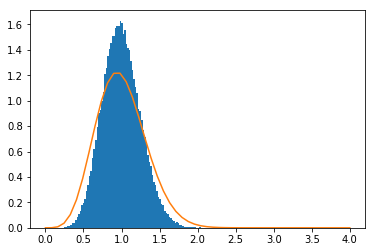

In [16]:
#wigner's surmise
s=[]
for i in range(100):
    m=Generate_GUE(1000)
    a,b=np.linalg.eigh(m)
    a.sort()
    unfolded=UnfoldingWigner(a)
    temp=[(unfolded[i+2]-unfolded[i])/2 for i in range(len(a)-2)]
    s.extend(temp)

plt.hist(s,density=bool,bins=100)
x=np.linspace(0,4,50)
y=ws4(np.array(x))
plt.plot(x,y)
plt.show()